In [11]:
#importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%matplotlib inline

# setting up plot style 
plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


In [3]:
#import dataset

df = pd.read_csv('../datasets/data_to_pca.csv')
#df.drop(columns = 'not_defined', inplace = True)
df.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,valor_frete_real,product_weight_g,product_photos_qty,payment_value,payment_sequential
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4,8.72,500.0,4.0,38.71,3.0
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4,22.76,400.0,1.0,141.46,1.0
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5,19.22,420.0,1.0,179.12,1.0
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5,27.20,450.0,3.0,72.20,1.0
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5,8.72,250.0,4.0,28.62,1.0


# Feature Engineering

## Date Columns

Add columns that are the difference between `order purchase` and anothers date columns

In [4]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [5]:
df['diff_approved'] = df['order_approved_at'] - df['order_purchase_timestamp'] #diff data aprovação da compra - data da compra
df['diff_carrier'] = df['order_delivered_carrier_date'] - df['order_purchase_timestamp']
df['diff_customer'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['diff_estimate'] = df['order_estimated_delivery_date'] - df['order_purchase_timestamp']
df['diff_est_del'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
df['diff_purchase_delivered'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']


#transforming the values in days difference
df['diff_approved']=df['diff_approved']/np.timedelta64(1,'D')
df['diff_carrier']=df['diff_carrier']/np.timedelta64(1,'D')
df['diff_customer']=df['diff_customer']/np.timedelta64(1,'D')
df['diff_estimate']=df['diff_estimate']/np.timedelta64(1,'D')
df['diff_est_del']=df['diff_est_del']/np.timedelta64(1,'D')
df['diff_purchase_delivered']=df['diff_purchase_delivered']/np.timedelta64(1,'D')

df.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,valor_frete_real,product_weight_g,product_photos_qty,payment_value,payment_sequential,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,diff_purchase_delivered
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4,8.72,500.0,4.0,38.71,3.0,0.007431,2.373924,8.436574,15.544063,7.107488,8.436574
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4,22.76,400.0,1.0,141.46,1.0,1.279745,1.742627,13.782037,19.137766,5.355729,13.782037
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,5,19.22,420.0,1.0,179.12,1.0,0.011505,0.216100,9.394213,26.639711,17.245498,9.394213
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5,27.20,450.0,3.0,72.20,1.0,0.012419,3.758252,13.208750,26.188819,12.980069,13.208750
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,5,8.72,250.0,4.0,28.62,1.0,0.042940,0.936053,2.873877,12.112049,9.238171,2.873877


In [6]:
#drop date columns
cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date']

df.drop(columns = cols, axis= 1, inplace = True)
df.head()

,review_score,valor_frete_real,product_weight_g,product_photos_qty,payment_value,payment_sequential,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,diff_purchase_delivered
0,4,8.72,500.0,4.0,38.71,3.0,0.007431,2.373924,8.436574,15.544063,7.107488,8.436574
1,4,22.76,400.0,1.0,141.46,1.0,1.279745,1.742627,13.782037,19.137766,5.355729,13.782037
2,5,19.22,420.0,1.0,179.12,1.0,0.011505,0.216100,9.394213,26.639711,17.245498,9.394213
3,5,27.20,450.0,3.0,72.20,1.0,0.012419,3.758252,13.208750,26.188819,12.980069,13.208750
4,5,8.72,250.0,4.0,28.62,1.0,0.042940,0.936053,2.873877,12.112049,9.238171,2.873877


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96454 entries, 0 to 96453
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review_score             96454 non-null  int64  
 1   valor_frete_real         96454 non-null  float64
 2   product_weight_g         96454 non-null  float64
 3   product_photos_qty       96454 non-null  float64
 4   payment_value            96454 non-null  float64
 5   payment_sequential       96454 non-null  float64
 6   diff_approved            96454 non-null  float64
 7   diff_carrier             96454 non-null  float64
 8   diff_customer            96454 non-null  float64
 9   diff_estimate            96454 non-null  float64
 10  diff_est_del             96454 non-null  float64
 11  diff_purchase_delivered  96454 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 8.8 MB


# Model

In [8]:
scaler = StandardScaler()

Xs = scaler.fit_transform(df)
#X = df.loc[:,:]
Xs

array([[-0.11174863, -0.728517  , -0.39547969, ..., -0.93499198,
        -0.3996738 , -0.43171035],
       [-0.11174863,  0.16644267, -0.41644509, ..., -0.52474933,
        -0.57170496,  0.12831648],
       [ 0.66057886, -0.05920955, -0.41225201, ...,  0.33164226,
         0.59592735, -0.33138163],
       ...,
       [ 0.66057886,  2.86024579,  2.28809142, ...,  0.75910079,
        -0.55510108,  1.28885812],
       [-1.6564036 ,  1.30299046,  2.24616062, ...,  1.52634504,
         0.86828086,  0.47450635],
       [ 0.66057886, -0.11402902, -0.46885859, ...,  0.15892722,
         0.61624915, -0.51157075]])

------------------------------------

## Applying t-SNE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 96454 samples in 0.629s...
[t-SNE] Computed neighbors for 96454 samples in 392.213s...
[t-SNE] Computed conditional probabilities for sample 1000 / 96454
[t-SNE] Computed conditional probabilities for sample 2000 / 96454
[t-SNE] Computed conditional probabilities for sample 3000 / 96454
[t-SNE] Computed conditional probabilities for sample 4000 / 96454
[t-SNE] Computed conditional probabilities for sample 5000 / 96454
[t-SNE] Computed conditional probabilities for sample 6000 / 96454
[t-SNE] Computed conditional probabilities for sample 7000 / 96454
[t-SNE] Computed conditional probabilities for sample 8000 / 96454
[t-SNE] Computed conditional probabilities for sample 9000 / 96454
[t-SNE] Computed conditional probabilities for sample 10000 / 96454
[t-SNE] Computed conditional probabilities for sample 11000 / 96454
[t-SNE] Computed conditional probabilities for sample 12000 / 96454
[t-SNE] Computed conditional probabilities for 

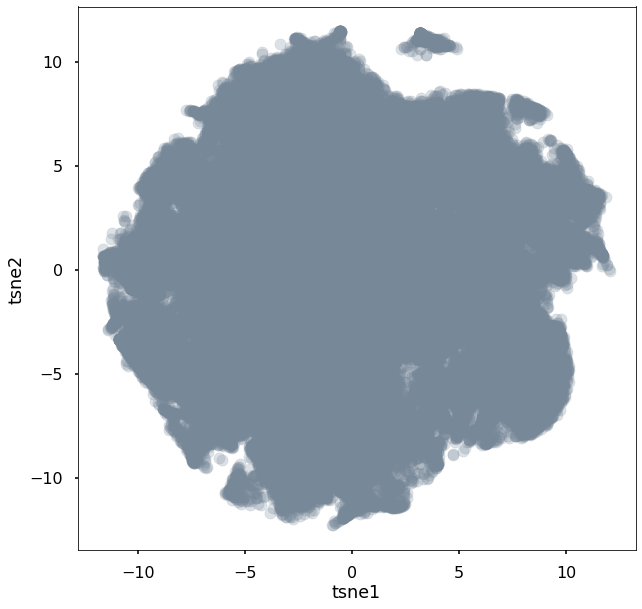

Wall time: 1h 16min 13s


In [9]:
%%time

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=500, learning_rate=100)
tsne_scale_results = tsne.fit_transform(Xs)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [15]:
tsne_df_scale.head()

,tsne1,tsne2,tsne3
0,3.180676,11.021272,3.060456
1,2.713161,-1.159450,4.114742
2,5.418466,2.897390,-0.858153
3,3.900634,1.778165,-7.318050
4,-10.296795,-0.559851,-1.851388


Text(0, 0.5, 'Inertia')

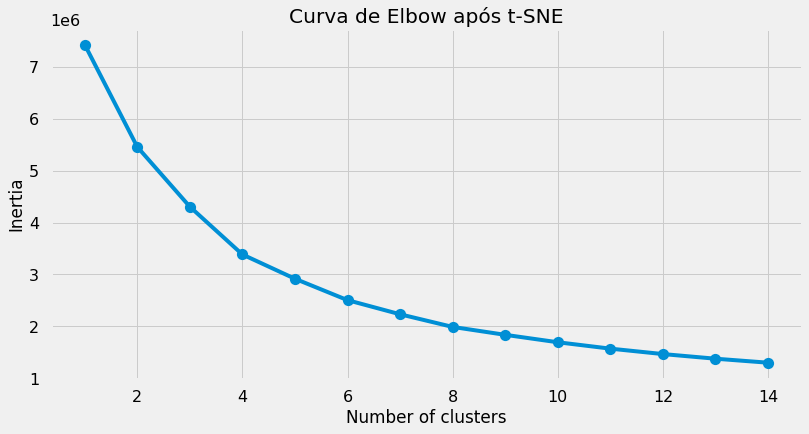

In [18]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Curva de Elbow após t-SNE')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [20]:
#applying kmeans in t-SNE

kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)

print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.27302801609039307


In [21]:
clusters_tsne_scale.head()

,tsne1,tsne2,tsne3,tsne_clusters
0,3.180676,11.021272,3.060456,3
1,2.713161,-1.159450,4.114742,2
2,5.418466,2.897390,-0.858153,2
3,3.900634,1.778165,-7.318050,0
4,-10.296795,-0.559851,-1.851388,1


In [27]:
clusters_tsne_scale.to_csv('cluster_tsne_scale.csv', index = False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


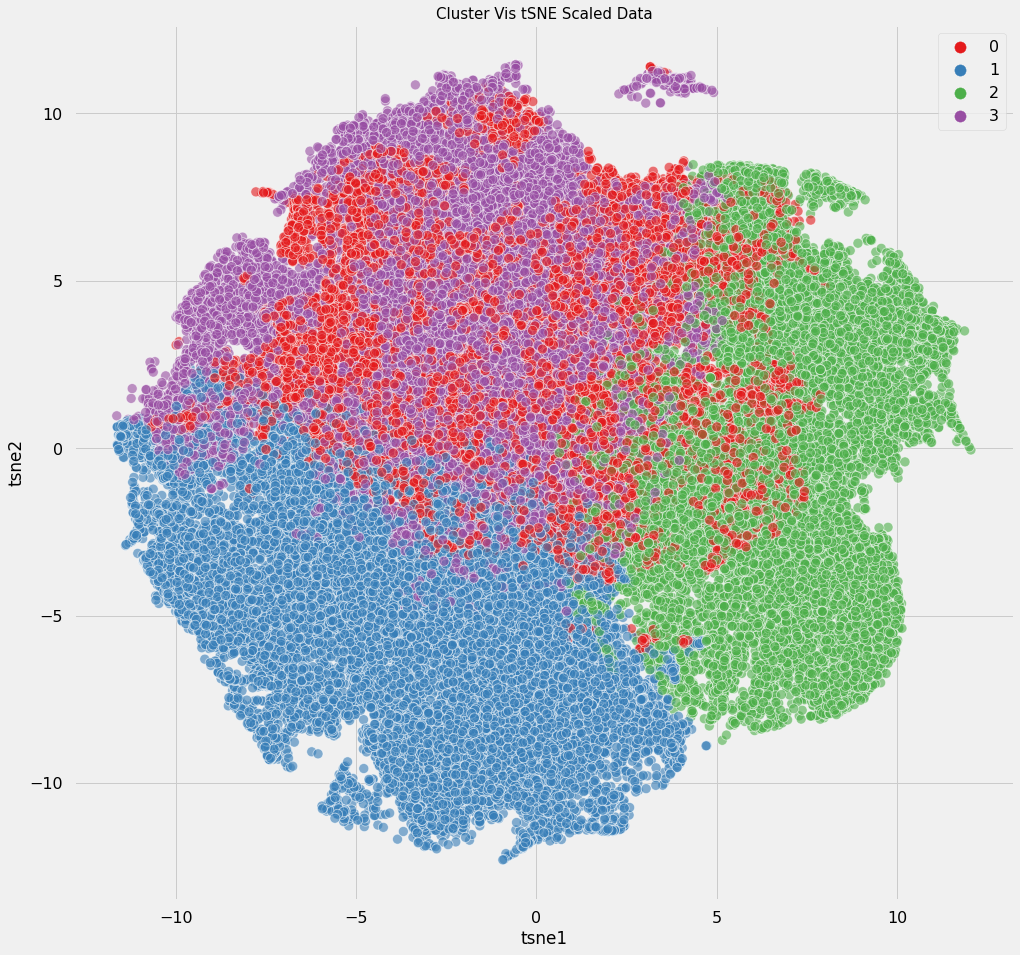

In [22]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [23]:
cluster_tsne_profile = pd.merge(df, clusters_tsne_scale['tsne_clusters'], left_index=True, right_index=True )
cluster_tsne_profile.head()

,review_score,valor_frete_real,product_weight_g,product_photos_qty,payment_value,payment_sequential,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,diff_purchase_delivered,tsne_clusters
0,4,8.72,500.0,4.0,38.71,3.0,0.007431,2.373924,8.436574,15.544063,7.107488,8.436574,3
1,4,22.76,400.0,1.0,141.46,1.0,1.279745,1.742627,13.782037,19.137766,5.355729,13.782037,2
2,5,19.22,420.0,1.0,179.12,1.0,0.011505,0.216100,9.394213,26.639711,17.245498,9.394213,2
3,5,27.20,450.0,3.0,72.20,1.0,0.012419,3.758252,13.208750,26.188819,12.980069,13.208750,0
4,5,8.72,250.0,4.0,28.62,1.0,0.042940,0.936053,2.873877,12.112049,9.238171,2.873877,1


In [25]:
cluster_tsne_profile.to_csv('cluster_tsne_profile.csv', index = False)

In [26]:
cluster_tsne_profile['tsne_clusters'].value_counts()

1    27058
3    24872
0    23010
2    21514
Name: tsne_clusters, dtype: int64

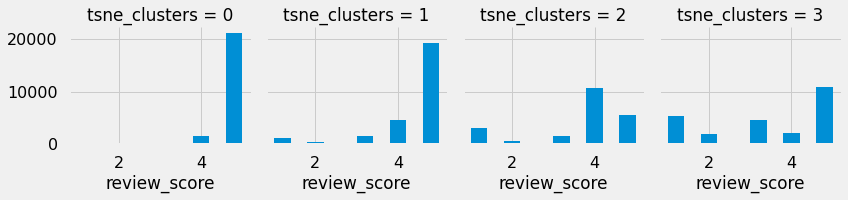

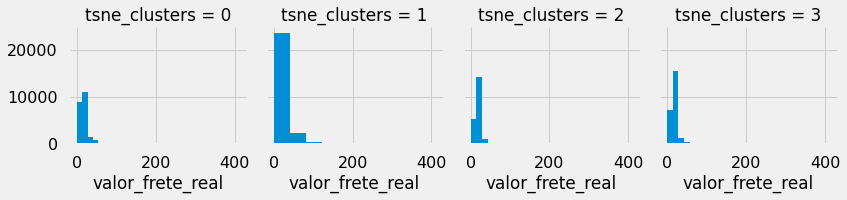

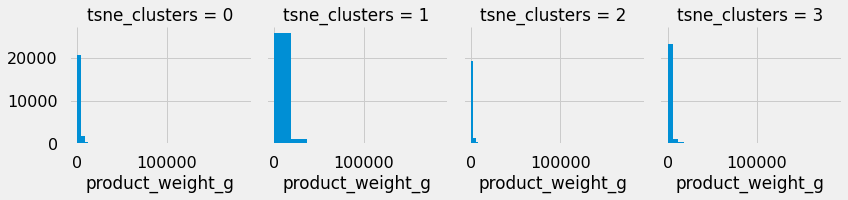

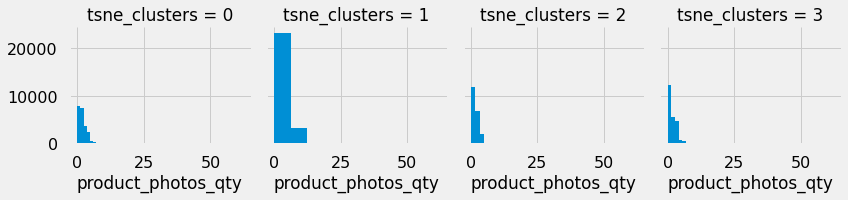

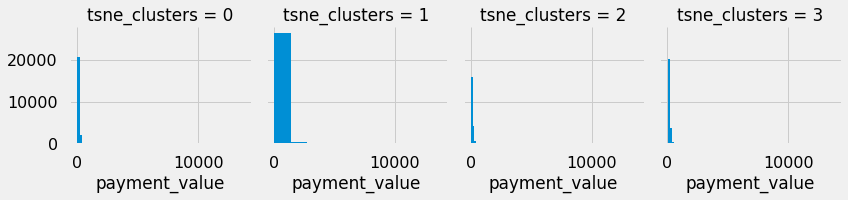

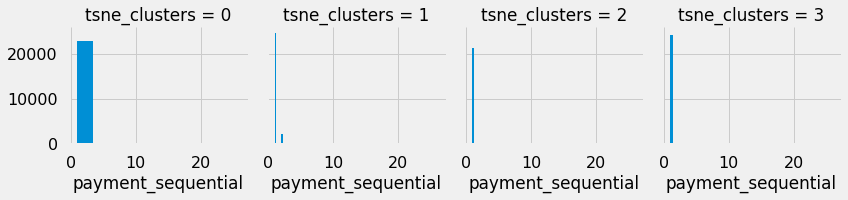

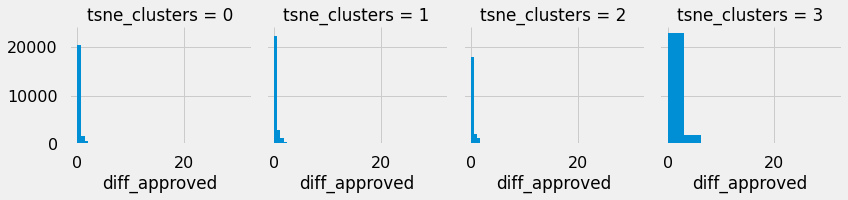

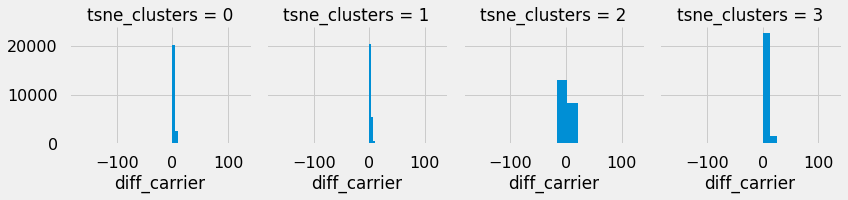

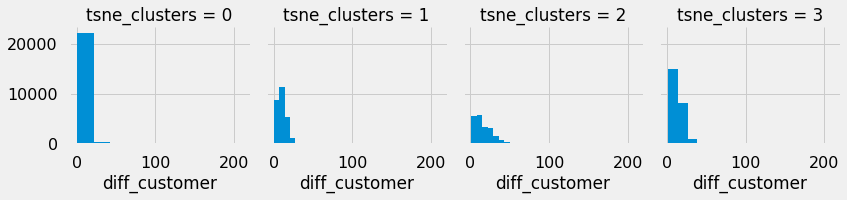

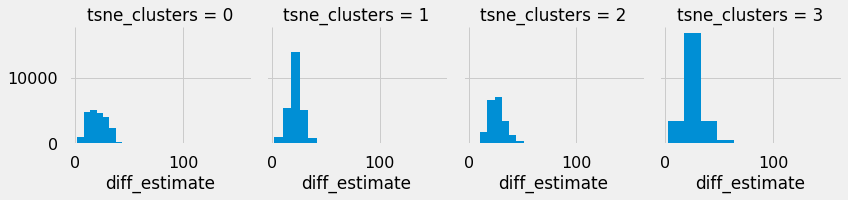

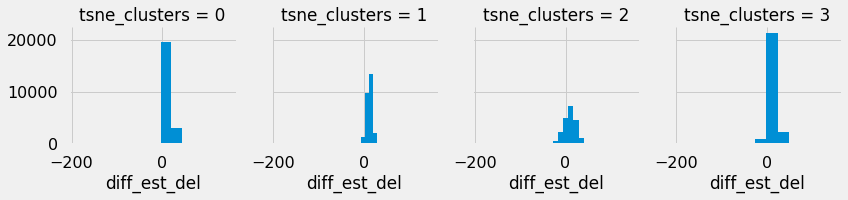

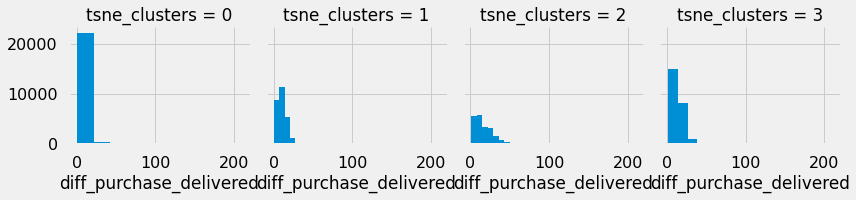

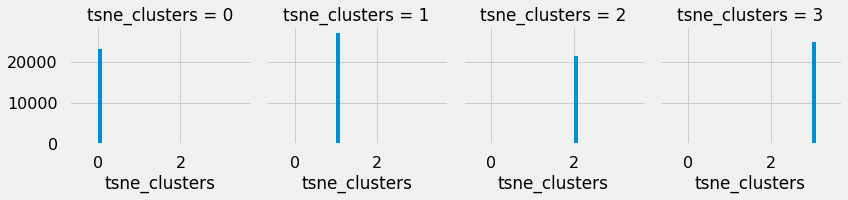

In [24]:
for c in cluster_tsne_profile:
    grid = sns.FacetGrid(cluster_tsne_profile, col='tsne_clusters')
    grid.map(plt.hist, c)

## Clusters EDA

In [37]:
cluster_tsne_profile.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas,tsne_clusters
0,4.0,29.99,8.72,40.0,268.0,4.0,0.0,1.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
1,4.0,118.70,22.76,29.0,178.0,1.0,1.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,159.90,19.22,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,5.0,45.00,27.20,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5.0,19.90,8.72,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4


In [38]:
conditions = [
    cluster_tsne_profile['tsne_clusters'] == 0,
    cluster_tsne_profile['tsne_clusters'] == 1,
    cluster_tsne_profile['tsne_clusters'] == 2,
    cluster_tsne_profile['tsne_clusters'] == 3,
    cluster_tsne_profile['tsne_clusters'] == 4
]

values = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

cluster_tsne_profile['cluster_name'] = np.select(conditions,values)
cluster_tsne_profile.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas,tsne_clusters,cluster_name
0,4.0,29.99,8.72,40.0,268.0,4.0,0.0,1.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,Cluster 3
1,4.0,118.70,22.76,29.0,178.0,1.0,1.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Cluster 1
2,5.0,159.90,19.22,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Cluster 4
3,5.0,45.00,27.20,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Cluster 1
4,5.0,19.90,8.72,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,Cluster 5


In [39]:
cluster_tsne_profile['cluster_name'].value_counts()

Cluster 3    18033
Cluster 1    16346
Cluster 2    15997
Cluster 5    15537
Cluster 4    13811
Name: cluster_name, dtype: int64

In [40]:
cluster_1 = cluster_tsne_profile[cluster_tsne_profile['cluster_name'] == 'Cluster 1']
cluster_2 = cluster_tsne_profile[cluster_tsne_profile['cluster_name'] == 'Cluster 2']
cluster_3 = cluster_tsne_profile[cluster_tsne_profile['cluster_name'] == 'Cluster 3']
cluster_4 = cluster_tsne_profile[cluster_tsne_profile['cluster_name'] == 'Cluster 4']
cluster_5 = cluster_tsne_profile[cluster_tsne_profile['cluster_name'] == 'Cluster 5']

### Reviews

In [41]:
rs_prop_1 = cluster_1['review_score'].value_counts(normalize=True).reset_index().rename(columns = {'review_score': 'percent',
                                                                                                   'index':'review_score'})
rs_prop_1['Cluster'] = 'Cluster 1'

rs_prop_2 = cluster_2['review_score'].value_counts(normalize=True).reset_index().rename(columns = {'review_score': 'percent',
                                                                                                   'index':'review_score'})
rs_prop_2['Cluster'] = 'Cluster 2'

rs_prop_3 = cluster_3['review_score'].value_counts(normalize=True).reset_index().rename(columns = {'review_score': 'percent',
                                                                                                   'index':'review_score'})
rs_prop_3['Cluster'] = 'Cluster 3'

rs_prop_4 = cluster_4['review_score'].value_counts(normalize=True).reset_index().rename(columns = {'review_score': 'percent',
                                                                                                   'index':'review_score'})
rs_prop_4['Cluster'] = 'Cluster 4'

rs_prop_5 = cluster_5['review_score'].value_counts(normalize=True).reset_index().rename(columns = {'review_score': 'percent',
                                                                                                   'index':'review_score'})
rs_prop_5['Cluster'] = 'Cluster 5'

rs_prop = pd.concat([rs_prop_1,rs_prop_2, rs_prop_3, rs_prop_4, rs_prop_5])
rs_prop

,review_score,percent,Cluster
0,5.0,0.641074,Cluster 1
1,4.0,0.208675,Cluster 1
2,1.0,0.115502,Cluster 1
3,2.0,0.034749,Cluster 1
0,5.0,0.637244,Cluster 2
1,4.0,0.212602,Cluster 2
2,1.0,0.115772,Cluster 2
3,2.0,0.034381,Cluster 2
0,5.0,0.631398,Cluster 3
1,4.0,0.212721,Cluster 3


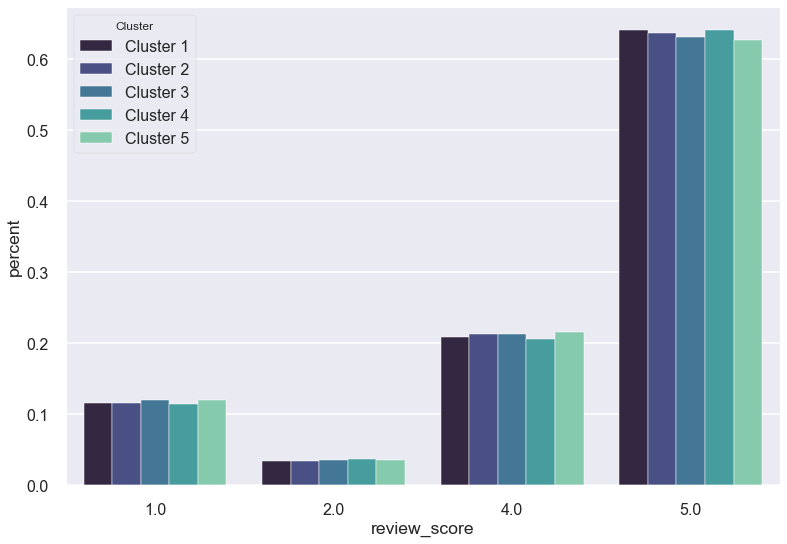

In [75]:
sns.barplot(x='review_score',
            y = 'percent',
            hue = 'Cluster',
            data = rs_prop,
            palette = 'mako')
plt.show()

### Price

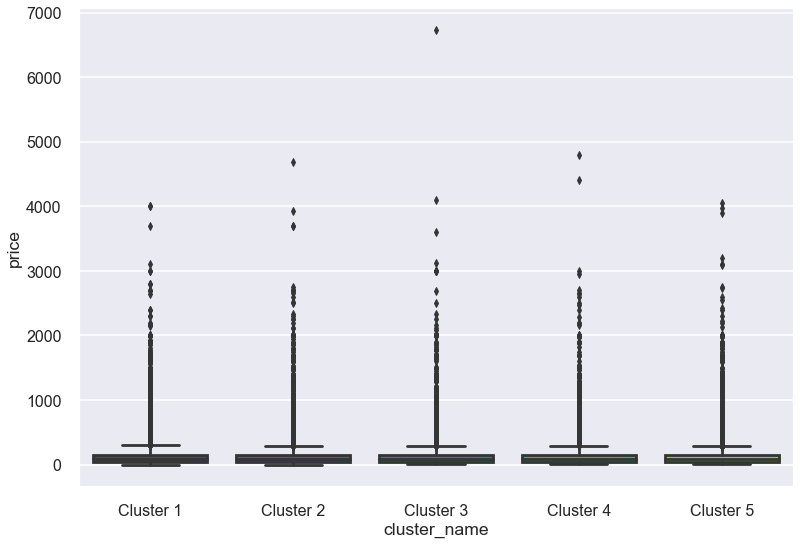

In [74]:
ax = sns.boxplot(y = 'price',
                 x = 'cluster_name',
                 data = cluster_tsne_profile,
                 palette = 'viridis',
                 order=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.show()

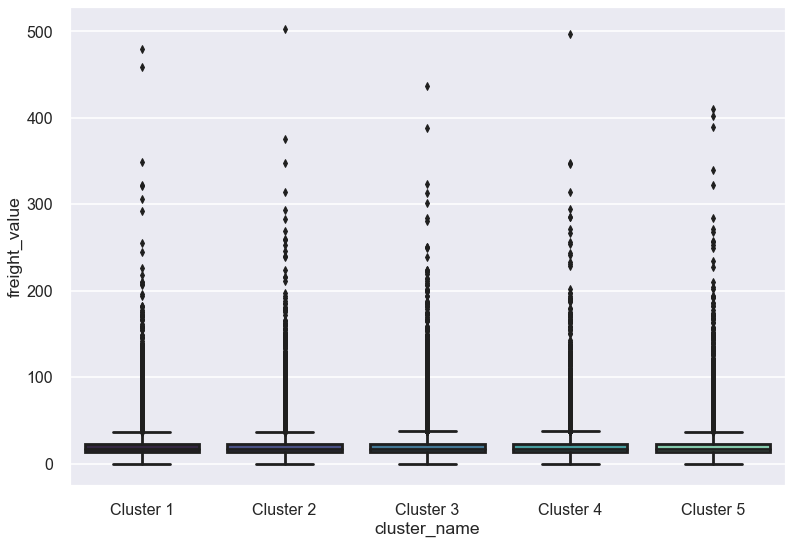

In [73]:
#fig.figsize = (15,8)
#sns.set_theme()

ax = sns.boxplot(y = 'freight_value',
            x = 'cluster_name',
            data = cluster_tsne_profile,
            palette = 'mako',
            order=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
#plt.show()

### Payment type

In [45]:
pmt_type = cluster_tsne_profile[['boleto','credit_card', 'debit_card', 'cluster_name']]
pmt_type.head()

,boleto,credit_card,debit_card,cluster_name
0,0.0,1.0,0.0,Cluster 3
1,1.0,0.0,0.0,Cluster 1
2,0.0,3.0,0.0,Cluster 4
3,0.0,1.0,0.0,Cluster 1
4,0.0,1.0,0.0,Cluster 5


In [46]:
pmt_type.groupby('cluster_name').sum()

,boleto,credit_card,debit_card
cluster_name,,,
Cluster 1,3220.0,45053.0,259.0
Cluster 2,3124.0,44211.0,234.0
Cluster 3,3614.0,49205.0,267.0
Cluster 4,2724.0,37906.0,235.0
Cluster 5,3035.0,42701.0,217.0


Não há diferença entre grupos em relação a tipo de pagamento.

### Região

In [47]:
df_regiao = cluster_tsne_profile[['customer_region_centro_oeste',
                              'customer_region_nordeste',
                              'customer_region_norte',
                              'customer_region_sudeste',
                              'customer_region_sul',
                              'cluster_name']]

KeyError: "['customer_region_sudeste', 'customer_region_centro_oeste', 'customer_region_nordeste', 'customer_region_sul', 'customer_region_norte'] not in index"

In [ ]:
df_regiao.head()

In [ ]:
regiao_grouped = df_regiao.groupby('cluster_name').sum()
regiao_grouped

In [ ]:
regiao_grouped.idxmax(axis=1)

#### Capital

In [76]:
capital_prop_1 = cluster_1['customer_capital'].value_counts(normalize=True).reset_index().rename(columns = {'customer_capital': 'percent',
                                                                                                   'index':'customer_capital'})
capital_prop_1['Cluster'] = 'Cluster 1'

capital_prop_2 = cluster_2['customer_capital'].value_counts(normalize=True).reset_index().rename(columns = {'customer_capital': 'percent',
                                                                                                   'index':'customer_capital'})
capital_prop_2['Cluster'] = 'Cluster 2'

capital_prop_3 = cluster_3['customer_capital'].value_counts(normalize=True).reset_index().rename(columns = {'customer_capital': 'percent',
                                                                                                   'index':'customer_capital'})
capital_prop_3['Cluster'] = 'Cluster 3'

capital_prop_4 = cluster_4['customer_capital'].value_counts(normalize=True).reset_index().rename(columns = {'customer_capital': 'percent',
                                                                                                   'index':'customer_capital'})
capital_prop_4['Cluster'] = 'Cluster 4'

capital_prop_5 = cluster_5['customer_capital'].value_counts(normalize=True).reset_index().rename(columns = {'customer_capital': 'percent',
                                                                                                   'index':'customer_capital'})
capital_prop_5['Cluster'] = 'Cluster 5'

capital_prop = pd.concat([capital_prop_1,capital_prop_2, capital_prop_3, capital_prop_4, capital_prop_4])
capital_prop

,customer_capital,percent,Cluster
0,0,0.623333,Cluster 1
1,1,0.376667,Cluster 1
0,0,0.633681,Cluster 2
1,1,0.366319,Cluster 2
0,0,0.629734,Cluster 3
1,1,0.370266,Cluster 3
0,0,0.628919,Cluster 4
1,1,0.371081,Cluster 4
0,0,0.628919,Cluster 4
1,1,0.371081,Cluster 4


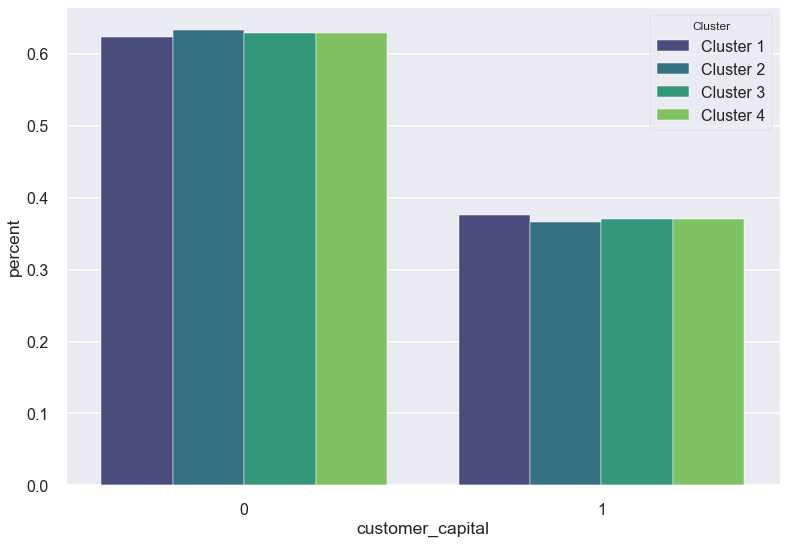

In [77]:
#Plot capital

sns.barplot(x='customer_capital',
            y = 'percent',
            hue = 'Cluster',
            data = capital_prop,
            palette = 'viridis')
plt.show()

### Categoria de Produtos

In [78]:
categ_prod = cluster_tsne_profile[['product_category_name_bebes',
'product_category_name_beleza_saude',
'product_category_name_brinquedos',
'product_category_name_cama_mesa_banho',
'product_category_name_consoles_games',
'product_category_name_construcao_ferramentas_construcao',
'product_category_name_cool_stuff',
'product_category_name_eletrodomesticos',
'product_category_name_eletronicos',
'product_category_name_eletroportateis',
'product_category_name_esporte_lazer',
'product_category_name_fashion_bolsas_e_acessorios',
'product_category_name_ferramentas_jardim',
'product_category_name_informatica_acessorios',
'product_category_name_instrumentos_musicais',
'product_category_name_livros_interesse_geral',
'product_category_name_malas_acessorios',
'product_category_name_moveis_decoracao',
'product_category_name_moveis_escritorio',
'product_category_name_no info',
'product_category_name_papelaria',
'product_category_name_perfumaria',
'product_category_name_pet_shop',
'product_category_name_relogios_presentes',
'product_category_name_telefonia',
'product_category_name_utilidades_domesticas',
'cluster_name']]

In [79]:
categ_grouped = categ_prod.groupby('cluster_name').sum()
categ_grouped

,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas
cluster_name,,,,,,,,,,,,,,,,,,,,,,,,,,
Cluster 1,504.0,1493.0,681.0,1730.0,183.0,131.0,637.0,135.0,472.0,107.0,1392.0,353.0,583.0,1206.0,94.0,91.0,184.0,1188.0,223.0,247.0,402.0,566.0,321.0,981.0,703.0,1018.0
Cluster 2,471.0,1559.0,673.0,1698.0,165.0,129.0,577.0,150.0,432.0,99.0,1361.0,303.0,651.0,1139.0,99.0,83.0,191.0,1112.0,203.0,234.0,438.0,553.0,317.0,964.0,678.0,1044.0
Cluster 3,537.0,1711.0,741.0,1901.0,186.0,142.0,741.0,147.0,486.0,126.0,1511.0,398.0,710.0,1267.0,111.0,113.0,200.0,1274.0,228.0,301.0,457.0,623.0,330.0,1081.0,798.0,1167.0
Cluster 4,440.0,1343.0,573.0,1461.0,151.0,112.0,539.0,93.0,383.0,102.0,1146.0,294.0,536.0,1042.0,112.0,92.0,165.0,959.0,183.0,194.0,339.0,478.0,239.0,821.0,624.0,789.0
Cluster 5,476.0,1503.0,675.0,1677.0,166.0,127.0,572.0,141.0,389.0,108.0,1247.0,317.0,553.0,1136.0,115.0,84.0,168.0,1103.0,184.0,241.0,397.0,533.0,306.0,970.0,682.0,1015.0


In [80]:
categ_grouped.idxmax(axis=1)

cluster_name
Cluster 1    product_category_name_cama_mesa_banho
Cluster 2    product_category_name_cama_mesa_banho
Cluster 3    product_category_name_cama_mesa_banho
Cluster 4    product_category_name_cama_mesa_banho
Cluster 5    product_category_name_cama_mesa_banho
dtype: object

### Tempo de entrega

In [81]:
time_delivered = cluster_tsne_profile[['diff_approved', 
                                   'diff_carrier',
                                   'diff_customer',
                                   'diff_estimate',
                                   'diff_est_del',
                                   'cluster_name']]

time_delivered.head()

,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,cluster_name
0,0.007431,2.373924,8.436574,15.544063,7.107488,Cluster 3
1,1.279745,1.742627,13.782037,19.137766,5.355729,Cluster 1
2,0.011505,0.216100,9.394213,26.639711,17.245498,Cluster 4
3,0.012419,3.758252,13.208750,26.188819,12.980069,Cluster 1
4,0.042940,0.936053,2.873877,12.112049,9.238171,Cluster 5


In [82]:
time_del_grouped = time_delivered.groupby('cluster_name').mean().reset_index()
time_del_grouped

,cluster_name,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del
0,Cluster 1,0.429122,3.177122,12.388946,23.759382,11.370437
1,Cluster 2,0.427987,3.232914,12.428791,23.778383,11.349592
2,Cluster 3,0.424387,3.134120,12.395703,23.690706,11.295002
3,Cluster 4,0.422605,3.155899,12.324463,23.774532,11.450069
4,Cluster 5,0.425465,3.189857,12.397503,23.746755,11.349252


In [83]:
tidy_time_del_grouped = time_del_grouped.melt(id_vars='cluster_name').rename(columns=str.title)
tidy_time_del_grouped

,Cluster_Name,Variable,Value
0,Cluster 1,diff_approved,0.429122
1,Cluster 2,diff_approved,0.427987
2,Cluster 3,diff_approved,0.424387
3,Cluster 4,diff_approved,0.422605
4,Cluster 5,diff_approved,0.425465
5,Cluster 1,diff_carrier,3.177122
6,Cluster 2,diff_carrier,3.232914
7,Cluster 3,diff_carrier,3.134120
8,Cluster 4,diff_carrier,3.155899
9,Cluster 5,diff_carrier,3.189857


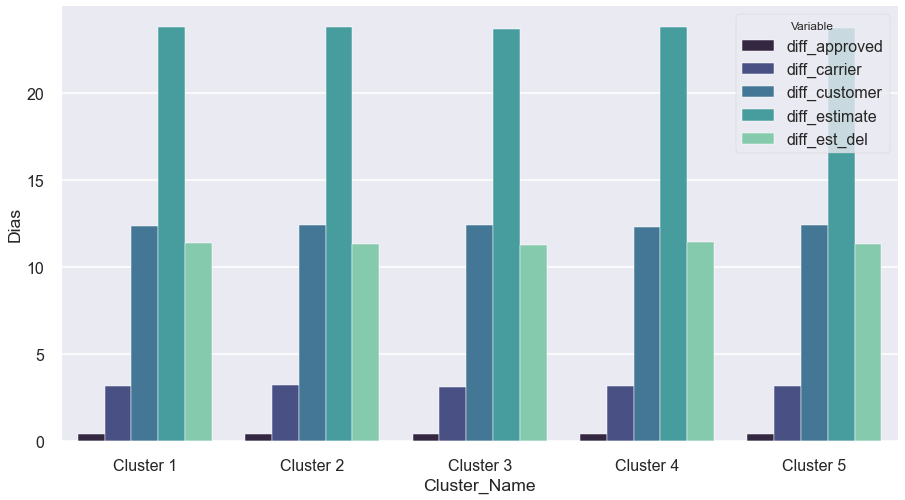

In [86]:
ax = fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x='Cluster_Name', 
                 y='Value', 
                 hue='Variable', 
                 data=tidy_time_del_grouped, 
                 ax=ax,
                 palette = 'mako',
                 order = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
ax.set_ylabel('Dias')
sns.despine(fig)